# UBER DATA ANALYSIS


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
%matplotlib inline

In [5]:
df = pd.read_csv("/Uber Drives - .csv")

In [7]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [19]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [20]:
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [9]:
import datetime
import calendar

In [11]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [12]:
df.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [10]:
data = df.copy()


In [21]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [12]:
data = data.dropna()

In [17]:
data.isnull().any()

START_DATE*    False
END_DATE*      False
CATEGORY*      False
START*         False
STOP*          False
MILES*         False
PURPOSE*       False
dtype: bool

In [36]:
data["START_DATE*"] = pd.to_datetime(data["START_DATE*"] , format = '%m/%d/%Y %H:%M')

In [37]:
data["END_DATE*"] = pd.to_datetime(data["END_DATE*"] , format = '%m/%d/%Y %H:%M')

In [38]:
data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [39]:
hour = []
day = []
month = []
weekdays =[]
dayofweek = []



for x in data["START_DATE*"]:
  hour.append(x.hour)
  month.append(x.month)
  day.append(x.day)
  dayofweek.append(x.dayofweek)
  weekdays.append(calendar.day_name[dayofweek[-1]])

data['HOUR'] = hour
data['DAY'] = day
data['MONTH'] = month
data['WEEKDAYS'] = weekdays
data['DAYOFWEEK'] = dayofweek 

In [40]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,MONTH,WEEKDAYS,DAYOFWEEK
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,4
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,Wednesday,2
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,Wednesday,2


**CATEGORIES WE HAVE**

In [13]:
data['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

<Axes: xlabel='CATEGORY*', ylabel='count'>

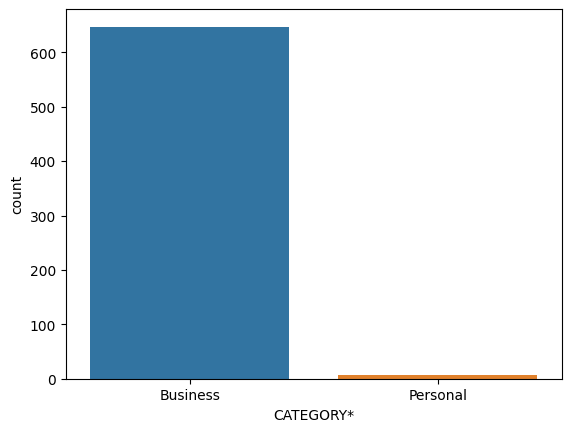

In [14]:
sns.countplot(x= 'CATEGORY*',data = data)

**How long do people travel with uber**

<Axes: ylabel='Frequency'>

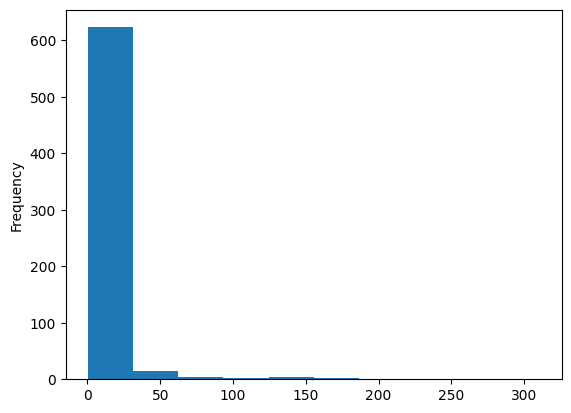

In [15]:
data['MILES*'].plot.hist()

**PURPOSE OF THE TRIPS**

<Axes: >

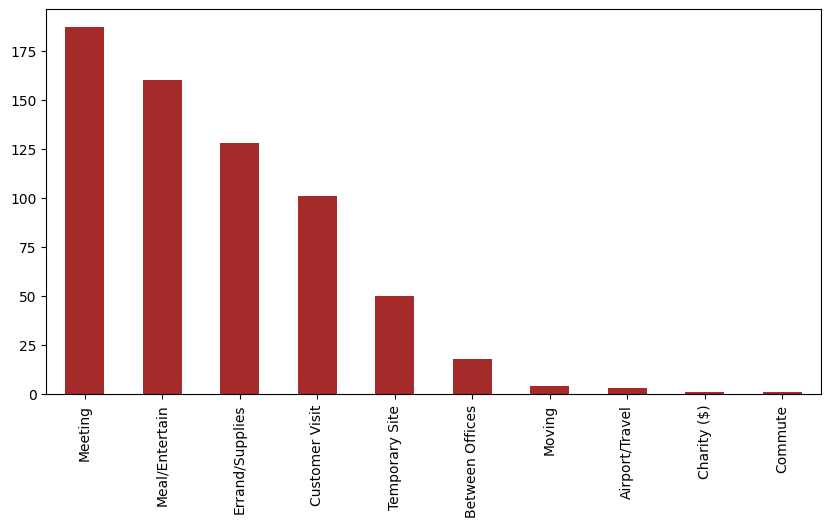

In [32]:
data['PURPOSE*'].value_counts().plot(kind = 'bar',figsize = (10,5),color = 'brown')

**WHICH DAT HAS THE HIGHEST NUMBER OF TRIP**

<Axes: >

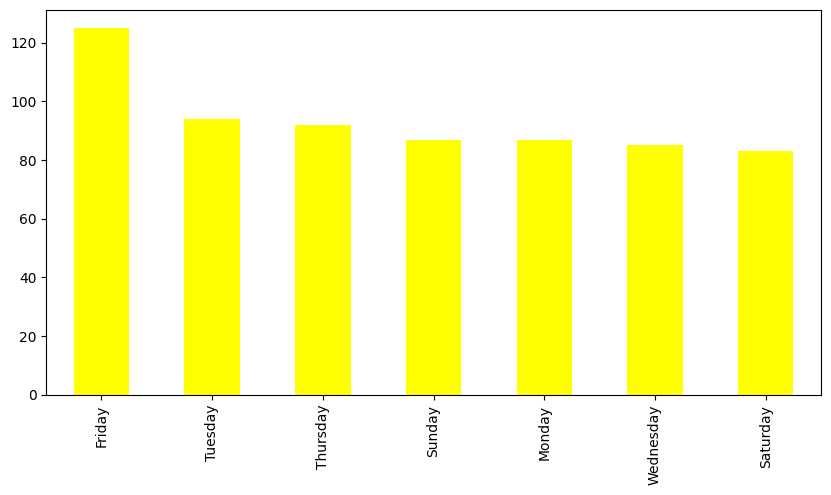

In [45]:
data['WEEKDAYS'].value_counts().plot(kind = 'bar',figsize = (10,5),color = 'yellow')

**WHAT hour do most people take uber during their destination**

Text(0.5, 1.0, 'Number of trips vs hours')

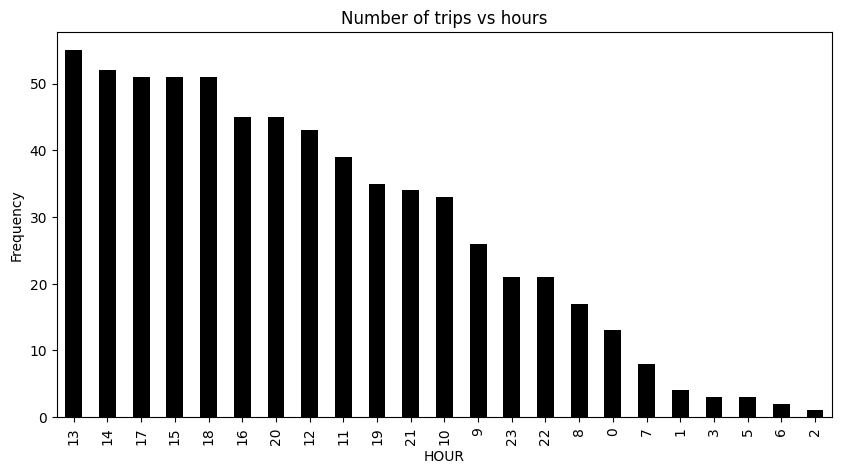

In [46]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind = 'bar',figsize=(10,5),color = 'black')
plt.xlabel('HOUR')
plt.ylabel('Frequency')
plt.title("Number of trips vs hours")

**what are the number of trips per each day**

<Axes: >

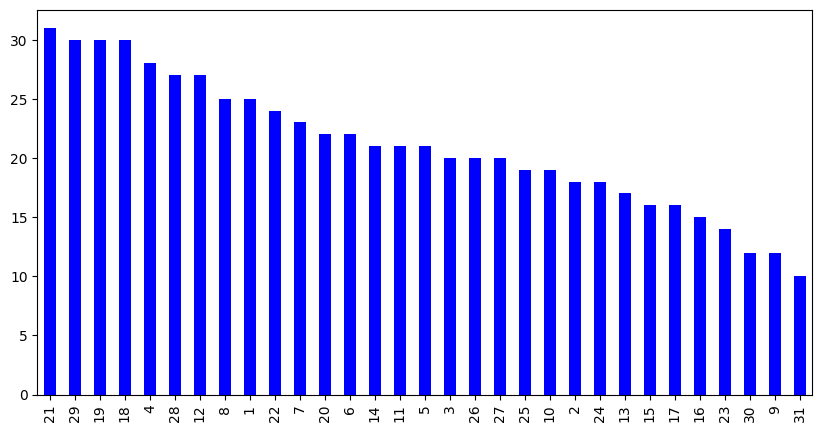

In [48]:
data['DAY'].value_counts().plot(kind = 'bar',figsize = (10,5),color = 'blue')

**WHAT ARE THE TRIPS IN THE MONTH**

<Axes: >

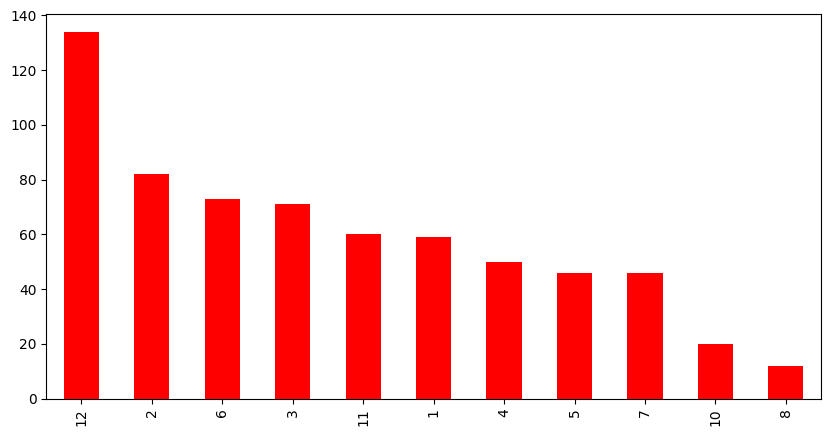

In [49]:
data['MONTH'].value_counts().plot(kind = 'bar',figsize = (10,5),color = 'red')

**THE STARTING POINT OF THE TRIP WHERE DO PEOPLE START BOARDING THEIR TRIP THE MOST**

<Axes: >

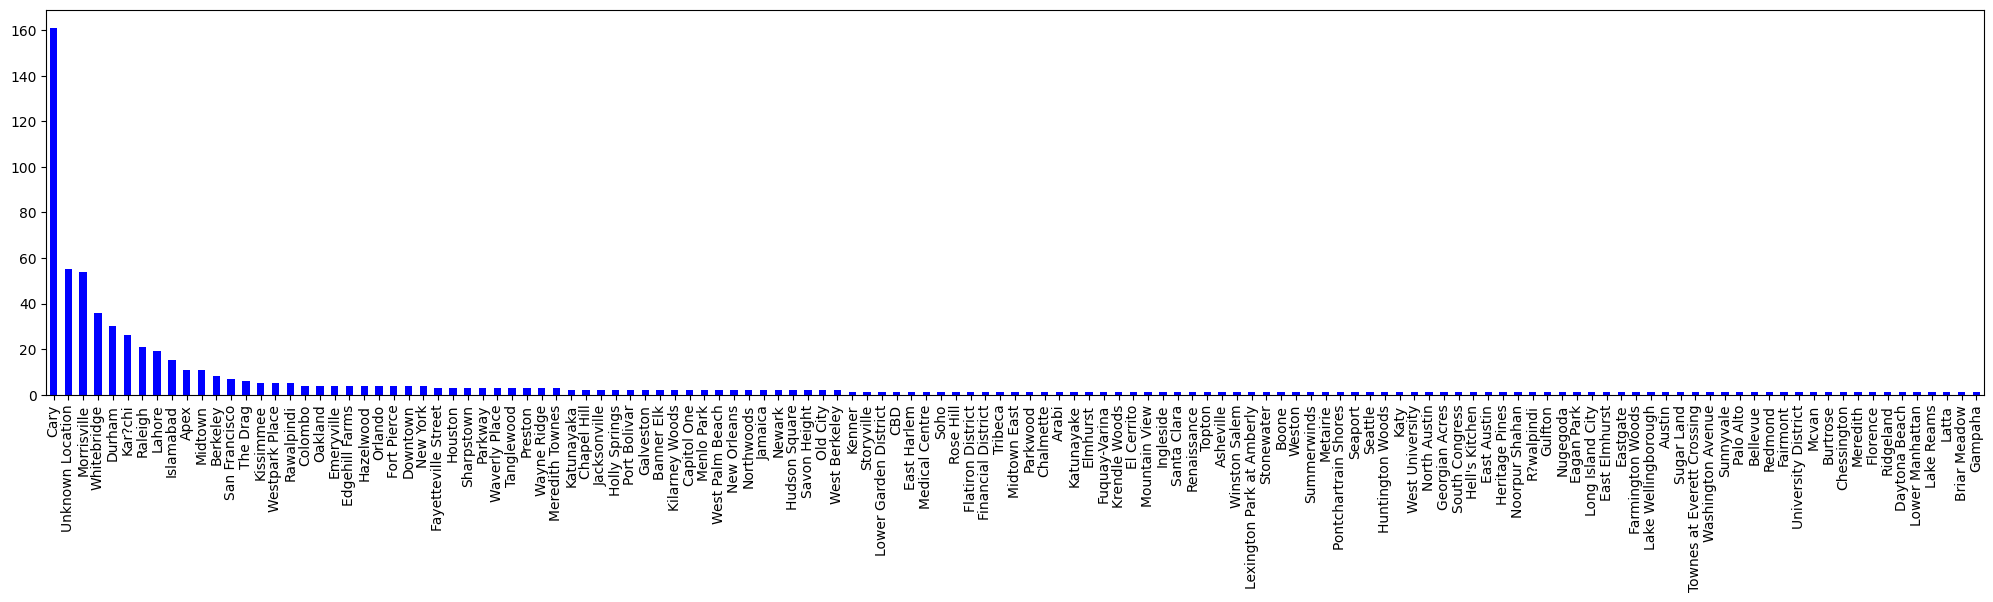

In [53]:
data['START*'].value_counts().plot(kind = 'bar',figsize = (25,5),color = 'blue')